<a href="https://colab.research.google.com/github/nazilaeshghi/zoomcamp2024-Projects-Midterm/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* dataset is:["Sleep_health_and_lifestyle_dataset.csv"]

For a project, you repository/folder should contain the following:

* `README.md` with
  * Description of the problem
  * Instructions on how to run the project
* Data
  * You should either commit the dataset you used or have clear instructions how to download the dataset
* Notebook (suggested name - `notebook.ipynb`) with
  * Data preparation and data cleaning
  * EDA, feature importance analysis
  * Model selection process and parameter tuning
* Script `train.py` (suggested name)
  * Training the final model
  * Saving it to a file (e.g. pickle) or saving it with specialized software (BentoML)
* Script `predict.py` (suggested name)
  * Loading the model
  * Serving it via a web service (with Flask or specialized software - BentoML, KServe, etc)
* Files with dependencies
  * `Pipenv` and `Pipenv.lock` if you use Pipenv
  * or equivalents: conda environment file, requirements.txt or pyproject.toml
* `Dockerfile` for running the service
* Deployment
  * URL to the service you deployed

In [ ]:
!pip install pandas scikit-learn kagglehub flask

In [36]:
!pip install kaggle

In [37]:
!kaggle datasets download -d uom190346a/sleep-health-and-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0
  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 4.23MB/s]


        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

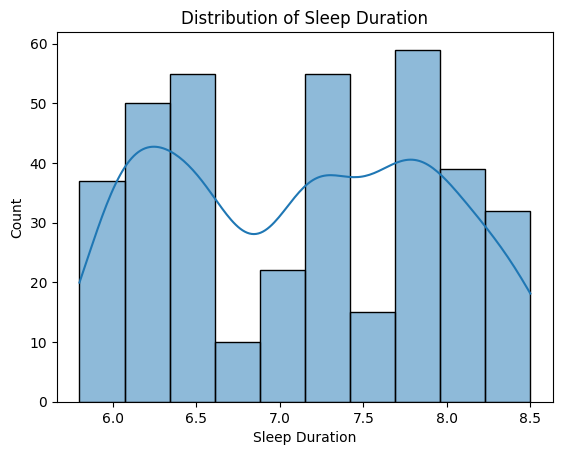

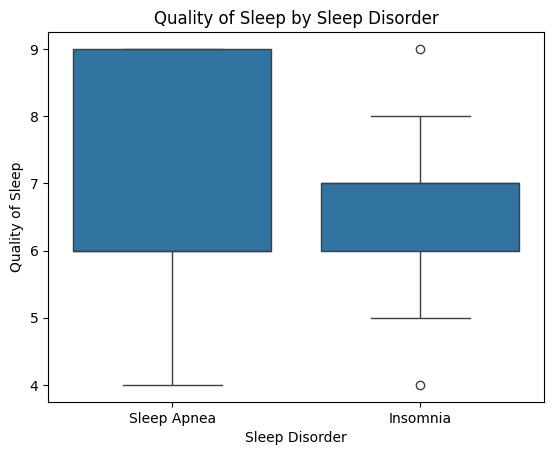

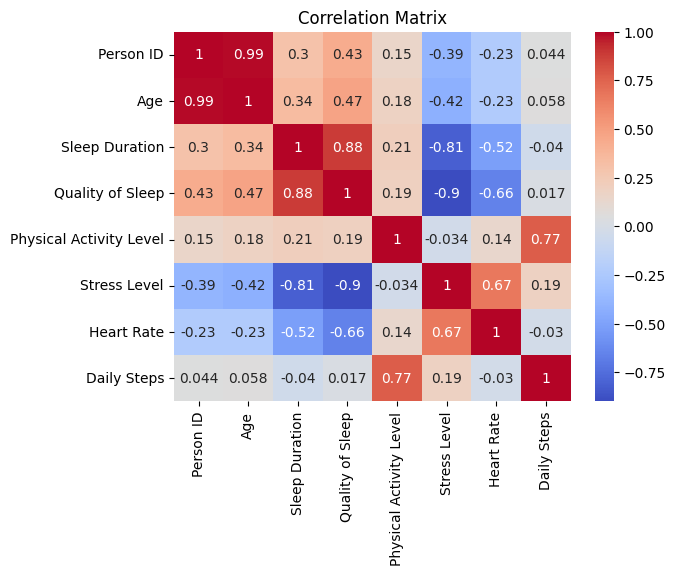

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Or any other model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Load the data, ensure to update `Sleep_health_and_lifestyle_dataset.csv` to the downloaded filename
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')  # Changed this line!

# Data cleaning and preprocessing
# Handle missing values (if any) - Example: fill with mean
numeric_data = data.select_dtypes(include=['number'])
data.fillna(numeric_data.mean(), inplace=True)

# EDA
# Explore data using visualizations and summary statistics
print(data.describe()) # Display summary statistics
# Visualize distributions of features
sns.histplot(data['Sleep Duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.show()

sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=data)
plt.title('Quality of Sleep by Sleep Disorder')
plt.show()


# Explore correlations between features
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()  # Calculate correlation for numerical data only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Feature importance analysis (if applicable)
# Using RandomForestClassifier for feature importance
X = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]  # Select features
y = data['Heart Rate']  # Target variable

# Model selection and training
X = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']]  # Select features
y = data['Heart Rate']  # Target variable

# One-hot encode 'BMI Category'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_bmi = encoder.fit_transform(X[['BMI Category']]) # Fit and transform the 'BMI Category' column
encoded_df = pd.DataFrame(encoded_bmi, columns=encoder.get_feature_names_out(['BMI Category'])) # Create a DataFrame from the encoded data
X = X.drop('BMI Category', axis=1) # Drop the original 'BMI Category' column
X = pd.concat([X, encoded_df], axis=1) # Concatenate the encoded DataFrame with the original features

# --- Convert 'Blood Pressure' to numerical features ---
# Split 'Blood Pressure' into systolic and diastolic
X[['Systolic', 'Diastolic']] = X['Blood Pressure'].str.split('/', expand=True).astype